# Data analysing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_parquet("../data/curated/result_df.parquet")
df

,earning_efficiency,trip_distance,PULocationID,time_of_day,day_of_week,snow_fall
0,1.187069,3.80,142,0,6,0.0
1,1.488095,2.10,236,0,6,0.0
2,1.088435,0.97,166,0,6,0.0
3,1.052527,1.09,114,0,6,0.0
4,1.606170,5.07,233,0,6,0.0
...,...,...,...,...,...,...
7235809,1.555603,0.80,230,23,4,0.0
7235810,1.174775,4.60,113,23,4,0.0
7235811,1.028918,1.90,238,23,4,0.0
7235812,1.137805,3.96,148,23,4,0.0


In [2]:
# aim to explore the realtion ship between time of day and earning efficiency
sub_df = df[['earning_efficiency']].groupby(df['time_of_day']).mean()
sub_df.reset_index(inplace=True)
sub_df.head()

,time_of_day,earning_efficiency
0,0,1.519429
1,1,1.539361
2,2,1.565487
3,3,1.592428
4,4,1.656081


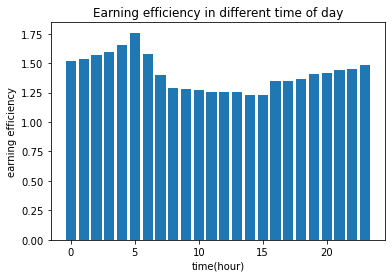

In [3]:
# visualise
plt.bar(sub_df['time_of_day'],sub_df['earning_efficiency'])
plt.xlabel('time(hour)')
plt.ylabel('earning efficiency')
plt.title('Earning efficiency in different time of day')
plt.show()

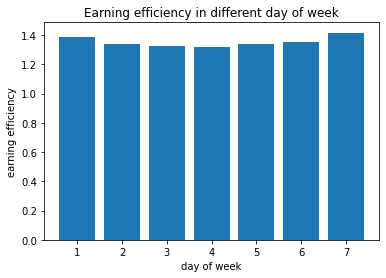

In [4]:
# do the same thing for day of week
sub_df = df[['earning_efficiency']].groupby(df['day_of_week']).mean()
sub_df.reset_index(inplace=True)
# visualise
plt.bar(sub_df['day_of_week'],sub_df['earning_efficiency'])
plt.xlabel('day of week')
plt.ylabel('earning efficiency')
plt.title('Earning efficiency in different day of week')
plt.show()

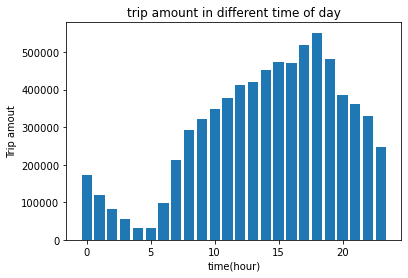

In [5]:
# let's also see the influence of these two value for the amount of trip also
sub_df = df[['trip_distance']].groupby(df['time_of_day']).count()
sub_df.reset_index(inplace=True)
sub_df.columns = ['time_of_day', 'trip_amount']

# same visualization method
plt.bar(sub_df['time_of_day'],sub_df['trip_amount'])
plt.xlabel('time(hour)')
plt.ylabel('Trip amout')
plt.title('trip amount in different time of day')
plt.show()

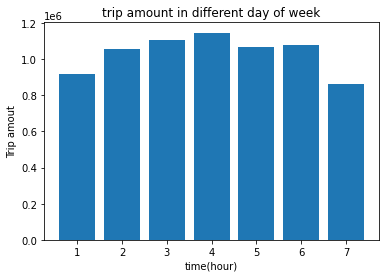

In [6]:
# this time for day of week
sub_df = df[['trip_distance']].groupby(df['day_of_week']).count()
sub_df.reset_index(inplace=True)
sub_df.columns = ['day_of_week', 'trip_amount']

# same visualization method
plt.bar(sub_df['day_of_week'],sub_df['trip_amount'])
plt.xlabel('time(hour)')
plt.ylabel('Trip amout')
plt.title('trip amount in different day of week')
plt.show()

Text(0, 0.5, 'earning efficiency')

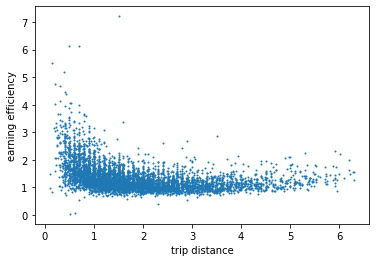

In [15]:
# next we want to observe the relationship between trip distance and our earning efficiency
sample_df = df.sample(n = 5000, random_state= 1234)
plt.scatter(sample_df['trip_distance'],sample_df['earning_efficiency'],s=1)
plt.xlabel('trip distance')
plt.ylabel('earning efficiency')

Looks like a 1/x graph

Text(0, 0.5, 'earning efficiency')

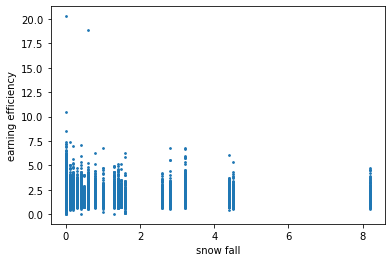

In [18]:
# now let's see the relationship between snow fall and earning efficiency
sample_df = df.sample(n = 100000, random_state= 1234)
plt.scatter(sample_df['snow_fall'],sample_df['earning_efficiency'],s=3)
plt.xlabel('snow fall')
plt.ylabel('earning efficiency')

there isn't any clear influence can be observed between them

In [36]:
# see if snow fall may influence the trip amout
# inorder to achieve this, I'll need my curated data for external dataset
# because the number of days of each snow fall number is different

# here is the sum count for snow fall for each temperature
sub_df = df[['trip_distance']].groupby(df['snow_fall']).count()
sub_df.reset_index(inplace=True)
sub_df.columns = ['snow_fall', 'trip_amount']
sub_df.head()


,snow_fall,trip_amount
0,0.0,4722058
1,0.1,428676
2,0.2,336538
3,0.3,138981
4,0.4,140668


In [37]:
# we need get the date number to get the mean count for each day under different snow_fall
snow = pd.read_csv('../data/curated/snow.csv')
snow_day_count = pd.DataFrame(snow['snow_fall'].value_counts())
snow_day_count.reset_index(inplace = True)
snow_day_count.columns = ['snow_fall', 'day_count']
snow_day_count.head()

,snow_fall,day_count
0,0.0,58
1,0.1,5
2,0.2,4
3,3.2,3
4,0.6,2


In [40]:
sub_df = sub_df.merge(snow_day_count, on = 'snow_fall')
sub_df["mean_trip_amount"] = sub_df['trip_amount']/sub_df['day_count']

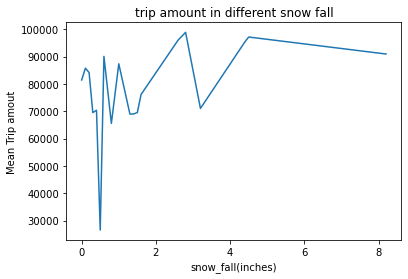

In [41]:
# visualization
plt.plot(sub_df['snow_fall'],sub_df['mean_trip_amount'])
plt.xlabel('snow_fall(inches)')
plt.ylabel('Mean Trip amout')
plt.title('trip amount in different snow fall')
plt.show()

actually looks pretty bad.....

In [45]:
sub_df.head(6)

snow_fall               0.0
trip_amount         26533.0
day_count               1.0
mean_trip_amount    26533.0
dtype: float64

Here we can see the 'outlier' is at the day snow fall = 0.5

In [ ]:
# let's move on to analyse he location
